# Lightcurve Generation
**Author**: Emma Babula  
**Description**: This notebook loads photometric data of Centaur objects from CSV files, filters by observing filter (`fid`), converts Julian Dates to relative time in hours, merges the data from different filters, and produces cleaned absolute magnitude lightcurves. Each lightcurve is plotted and saved as a PNG image for further period analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Create separate files for each set of fid (filter) data

In [2]:
object_list = ['2060', '54598', '145627']

for object in object_list:
    for fid in [1, 2]: 

        df = pd.read_csv(f"C:/Users/emmab/Github/Data/Lightcurve Data/{object}_data.csv")

        df_filter = df[df['fid'] == fid]

        merged_df = pd.DataFrame({
            'jd': df_filter['jd'],
            'fid': df_filter['fid'],
            'H': df_filter['H'], 
            'sigmapsf': df_filter['sigmapsf'],
            'heliodist': df_filter['heliodist']
        })

        merged_df.to_csv(f'C:/Users/emmab/Github/Data/Lightcurve Data/{object}_data_fid{fid}.csv', index=False)

#### Convert JD to hours and create new column

In [3]:
# Dictionary of jd minimums where hour will equal zero
zero_jd_dict = {
    '2060': 2458352.877037,
    '54598': 2458367.92625,
    '145627': 2459424.8971412
}

object_list = ['2060', '54598', '145627']

for object in object_list:
    if object not in zero_jd_dict:
        print(f"Zero JD value for object {object} is missing.")
        continue
    
    for fid in [1, 2]:

        df = pd.read_csv(f'C:/Users/emmab/Github/Data/Lightcurve Data/{object}_data_fid{fid}.csv')

        # Get the zero_jd for the current object
        zero_jd = zero_jd_dict[object]

        # Convert JD to hours
        def jd_to_hours(jd):
            return (jd - zero_jd) * 24

        df['hours'] = df['jd'].apply(jd_to_hours)
        columns = list(df.columns)
        columns = columns[:0] + ['hours'] + columns[0:-1]
        df = df[columns]

        df.to_csv(f'C:/Users/emmab/Github/Data/Lightcurve Data/{object}_data_fid{fid}.csv', index=False)

#### Merge separate fid dataframes into a single one

In [4]:
object_list = ['2060', '54598', '145627']

for object in object_list:

    df1 = pd.read_csv(f'C:/Users/emmab/Github/Data/Lightcurve Data/{object}_data_fid1.csv')
    df2 = pd.read_csv(f'C:/Users/emmab/Github/Data/Lightcurve Data/{object}_data_fid2.csv')

    merged_df = pd.concat([df1, df2])
    sorted_df = merged_df.sort_values(by='hours')

    sorted_df.to_csv(f'C:/Users/emmab/Github/Data/Lightcurve Data/{object}_hours_merged.csv', index=False)

#### Plot lightcurves

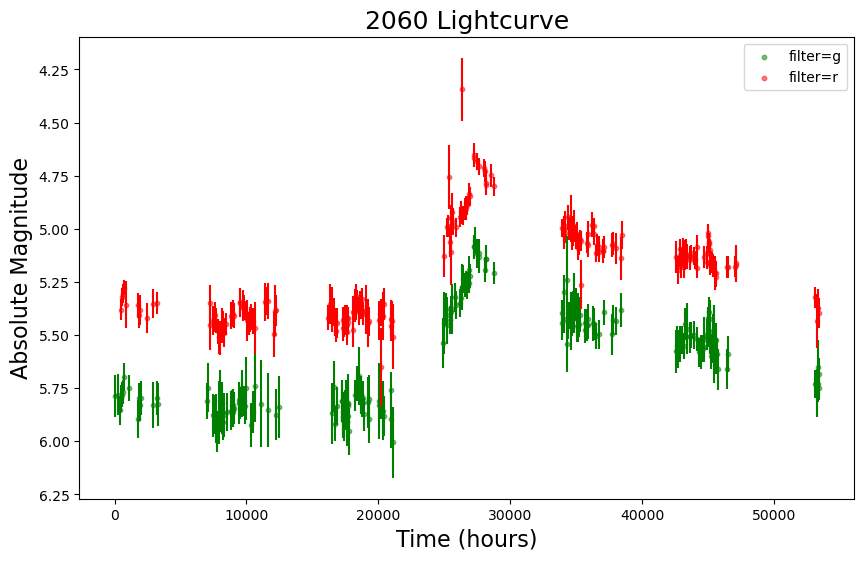

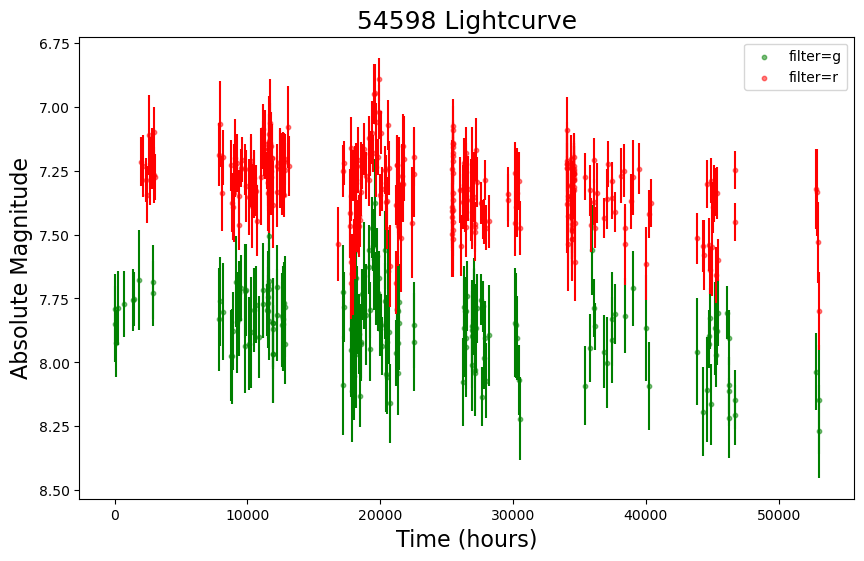

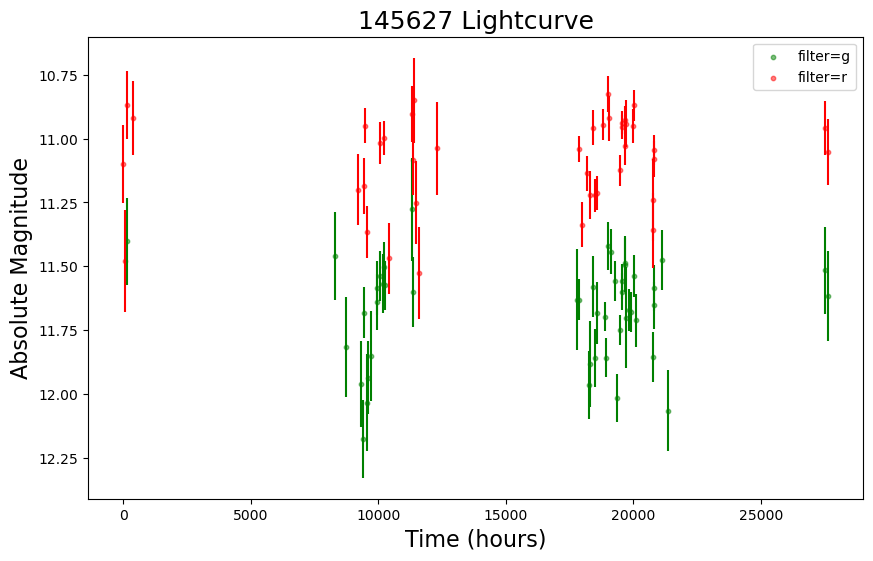

In [8]:
object_list = ['2060', '54598', '145627']

for object in object_list:

    df = pd.read_csv(f'C:/Users/emmab/Github/Data/Lightcurve Data/{object}_hours_merged.csv')

    # 145627 has an outlier, I filter it out here:
    if object == '145627':
        df = df[df['H'] >= 10]

    fid_1_data = df[df['fid'] == 1]
    fid_2_data = df[df['fid'] == 2]

    plt.figure(figsize=(10, 6))
    
    plt.scatter(fid_1_data['hours'], fid_1_data['H'], marker='o', s=10, alpha=0.5, color='green', label='filter=g')
    plt.errorbar(fid_1_data['hours'], fid_1_data['H'], yerr=fid_1_data['sigmapsf'], fmt='none', color='green')
    
    plt.scatter(fid_2_data['hours'], fid_2_data['H'], marker='o', s=10, alpha=0.5, color='red', label='filter=r')
    plt.errorbar(fid_2_data['hours'], fid_2_data['H'], yerr=fid_2_data['sigmapsf'], fmt='none', color='red')
    
    plt.title(f'{object} Lightcurve', fontsize=18)
    plt.xlabel('Time (hours)', fontsize=16)
    plt.ylabel('Absolute Magnitude', fontsize=16)
    plt.gca().invert_yaxis()
    plt.legend()
    
    plt.savefig(f'C:/Users/emmab/Github/Lightcurve Generation/Lightcurves/{object}_lightcurve.png')
    plt.show()
